# Exploration03 Classification Examples
###### 온라인 코어 2기 박수경

## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### 1) 데이터 가져오기 

- 먼저 필요한 모듈을 import 합니다.
- sklearn.datasets의 load_diabetes에서 데이터를 가져옵니다.
- 데이터의 정보와 shape, description을 확인합니다.
- diabetes의 data를 df_X에, target을 df_y에 저장합니다.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes #사이킷런 내장 데이터셋에서 함수 불러오기

diabetes = load_diabetes() #데이터 로딩.

print('-diabetes의 타입 : ',type(diabetes))
print('-데이터의 dir : ', dir(diabetes))
print('-데이터의 keys : ', diabetes.keys())

-diabetes의 타입 :  <class 'sklearn.utils.Bunch'>
-데이터의 dir :  ['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']
-데이터의 keys :  dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print(diabetes.feature_names)
print(diabetes.DESCR) # 데이터의 description을 확인했습니다.

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides lev

데이터의 description을 확인한 결과 
Diabetes dataset은, 442명의 당뇨병 환자들의 age, sex, body mass index, average blood
pressure, and six blood serum measurements를 기록한 데이터셋이며, 각각의 컬럼은 표준편차를 기준으로 Scaled 되었음을 알려주고 있습니다.

In [4]:
df_X = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)

print('df_X의 shape : ', df_X.shape)
df_X.info()
display(df_X.head())

df_y = pd.DataFrame(diabetes.target, columns=['target'])



df_X의 shape :  (442, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### 2) 모델에 입력할 데이터 X 준비하기

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [5]:
X = df_X.values #values 와 to_numpy() 모두 이용가능합니다.

### 3) 모델에 예측할 데이터 y 준비하기

- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [6]:
y = df_y['target'].values 

### 4) train 데이터와 test 데이터로 분리하기

- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1004)

### 5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [8]:
W = np.random.rand(10) #10개의 피처이기 때문에.
b = np.random.rand()

print(W)
print("===============================================")
print(b)

[0.62559127 0.95277125 0.31142015 0.07601266 0.94355306 0.20226182
 0.92873261 0.41181208 0.51465167 0.88959242]
0.9446195829254223


In [9]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

### 6) 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의해주세요.


In [10]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

MSE를 먼저 정의합니다. Mean squared error 은 오차의 제곱의 평균입니다. 

In [11]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

손실함수 loss을 정의합니다. 손실함수란 우리가 예측한 값과 실제 값의 차이 입니다. 위의 모델이 예측한 값과 실제 값의 MSE를 계산해 주는 함수로 정의했습니다.

### 7) 기울기를 구하는 gradient 함수 구현하기

- 기울기를 계산하는 gradient 함수를 구현해주세요.

gradient 는 기울기를 구하는 함수로 정의할 것입니다. 이를 위해 몇가지 ndarray를 살펴보면, 행렬을 transpose 하는 메서드 T와 (행과 열을 교환하여 전치행렬을 만듬), 두 배열을 Product하는 dot을 알아야 합니다.  
(참고 : https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

$$\frac{∂L}{∂w_i} = \frac{1}{N} \sum_{i=1}^{N} \frac{∂L}{∂w_i} {\{(y_i,true - y_i,pred)^2\}} $$  
결국, $$ = \frac{1}{N} \sum_{i=1}^{N} 2x_i {(y_i,true - y_i,pred)} $$  
이므로 다음과 같이 나타낼 수 있습니다.

In [12]:
def gradient(X, W, b, y):
    
    N = len(y)# N은 찍히는 데이터 포인트의 개수
    y_pred = model(X, W, b) #모델이 예측한 y값
    dW = 1/N * 2 * X.T.dot(y_pred - y) #T는 행렬 전치, dot은 행렬의 곱.
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

즉 $$ x_1(y_1,pred - y1,true) + x_2(y_2,pred - y2,true) + ... + x_N(y_N,pred - yN,true) $$
을 행렬의 곱의 식으로 나타낸 것입니다.
특별히 b의 gradient는, 이는 y_pred를 b로 미분했을 때 1이 되기 때문에 더이상 x와 관련이 없이  
$$ \frac{∂L}{∂b} = \frac{1}{N} \sum_{i=1}^{N} 2{(y_i,true - y_i,pred)} $$  
로 나타낼 수 있고, 이는 $$ 2(y_i,pred - y) $$의 평균으로 나타낼 수 있습니다.

In [13]:
dW, db = gradient(X, W, b, y) #경사를 계산해서 출력해 보았다.
print("dW:", dW)
print("db:", db)

dW: [-1.36921808 -0.30995014 -4.29049942 -3.22781355 -1.54303541 -1.26631748
  2.89047114 -3.14583932 -4.13707944 -2.79308856]
db: -302.37772915994105


### 8) 하이퍼 파라미터인 학습률 설정하기

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [14]:
learning_rate = 0.2

학습률은 하이터 파라미터입니다. 하이퍼 파라미터는 모델이 자동으로 최적의 값을 찾아가는 W,b 와는 다르게 우리가 정해주는 값입니다. 하이퍼 파라미터에 의해서도 모델의 성능이 영향을 크게 받는 경우가 많습니다.

### 9) 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [15]:
losses = []

for i in range(1, 4000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        if i == 10 or i == 100 or i == 1000 or i == 3000 or i ==3500 or i==3900 or i==3990:
            print('Iteration %d : Loss %0.4f' % (i, L))
        else:
            pass

Iteration 10 : Loss 5619.2146
Iteration 100 : Loss 4683.5077
Iteration 1000 : Loss 3141.9431
Iteration 3000 : Loss 2967.8130
Iteration 3500 : Loss 2963.7025
Iteration 3900 : Loss 2961.9031
Iteration 3990 : Loss 2961.6042


( Loss 값이 너무 많이 출력되어 적당히 사잇값들을 출력했습니다. 처음에는 10번 박복마다 learning rate를 모두 볼 수 있게 출력하여 확인했습니다.)

loss 함수의 값이 거의 정체될 때까지 반복을 시도했습니다. learning_rate의 값을 키워가며 보폭을 늘리고, 반복을 늘려 충분한 값에 도달할 때까지 해 보았습니다.

### 10) test 데이터에 대한 성능 확인하기

- test 데이터에 대한 성능을 확인해주세요.

In [16]:
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2666.5306965575924

------------------------------------  
MSE 값 : 2666.53  

------------------------------------  


### 11) 정답 데이터와 예측한 데이터 시각화하기

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

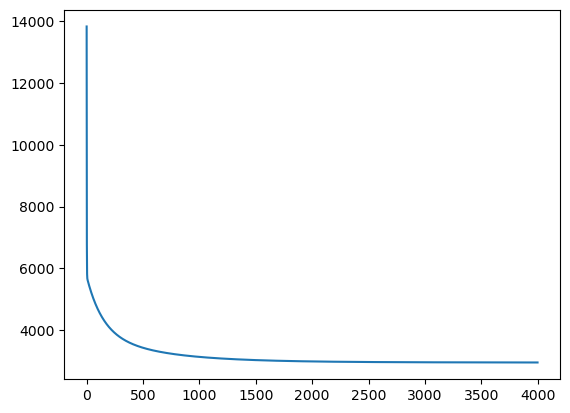

In [17]:
plt.plot(losses)
plt.show()

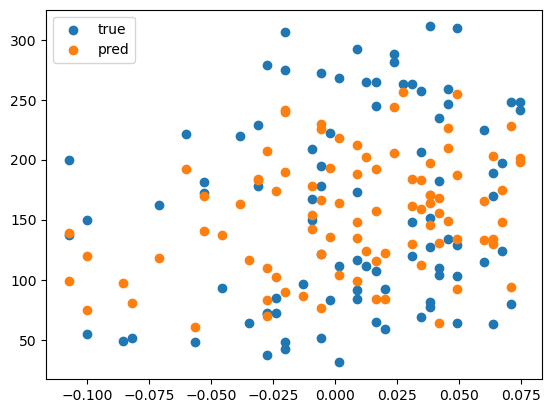

In [18]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

대체로 예측을 하고는 있다고 판단했습니다. 판단 정확도는 random state 가 달라짐에 따라 조금씩 변화가 있습니다.

## 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### 1) 데이터 가져오기

- train.csv 데이터를 train 변수로 가져 옵니다.
- 데이터의 정보와 shape, description을 확인합니다.

In [19]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [20]:

train = pd.read_csv("~/aiffel/Exploration/E04/data/train.csv")
display(train.head())
type(train)
train.info()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


https://www.kaggle.com/c/bike-sharing-demand/data 에서 데이터 피처의 의미를 읽어보았습니다.  

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter    (계절을 레이블 인코딩 한 값)  
holiday - whether the day is considered a holiday  (공휴일 여부)  
workingday - whether the day is neither a weekend nor holiday (공휴일도 아니고 주말도 아닌 날)   
weather -  (날씨를 레이블 인코딩 한 값)
> 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
> 3:Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  

temp - temperature in Celsius (온도)  
atemp - "feels like" temperature in Celsius (체감온도)     
humidity - relative humidity (상대습도)  
windspeed - wind speed  (풍속)  
casual - number of non-registered user rentals initiated   
registered - number of registered user rentals initiated   
count - number of total rentals

### 2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

- to_datetime 활용  
(참고: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime)  
- pandas datetime extract year month day 키워드로 검색해서 참고했습니다.

In [21]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [22]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

### 3) year, month, day, hour, minute, second 데이터 개수 시각화하기

- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

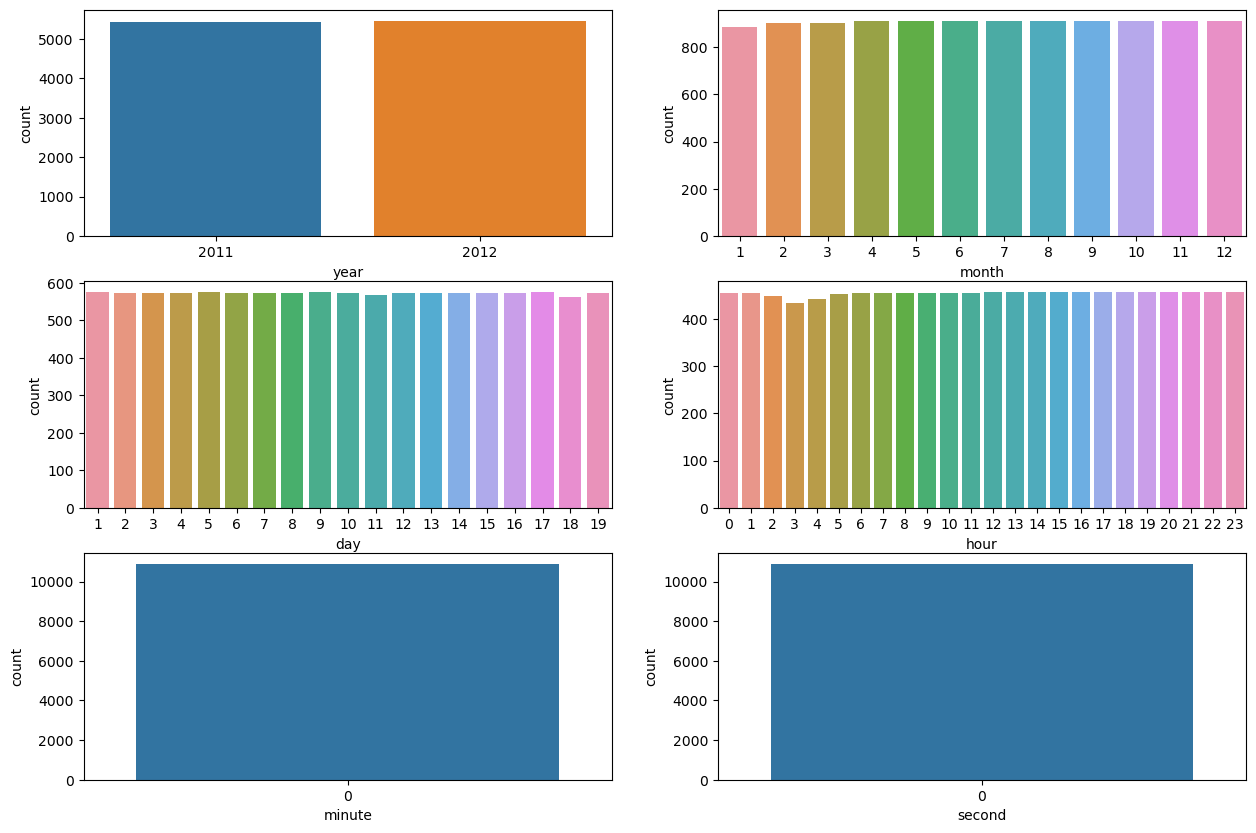

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(x='year', data=train)

plt.subplot(3,2,2)
sns.countplot(x='month', data=train)

plt.subplot(3,2,3)
sns.countplot(x='day', data=train)

plt.subplot(3,2,4)
sns.countplot(x='hour', data=train)

plt.subplot(3,2,5)
sns.countplot(x='minute', data=train)

plt.subplot(3,2,6)
sns.countplot(x='second', data=train)

plt.show()

### 4) X, y 컬럼 선택 및 train/test 데이터 분리

- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 보기
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

어떤 피처 컬럼을 조합하여 학습하는 데이터로 삼을지 고민해 봅니다. 우리가 타겟으로 삼는 것은 'count'입니다.   

In [24]:
train.corrwith(train['count'])

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
hour          0.400601
minute             NaN
second             NaN
dtype: float64

여기서 minuite과 second는 분 초 단위로 바뀌는 시간이기 때문에 의미가 없다고 생각했습니다. 또한 casual과 resistered는 결국 count된 수 중에서 등록이 된 대여수와 안된 대여수를 의미하는 것이므로 늘 합은 그 행의 count값(총대여수)과 같습니다. 따라서 데이터 학습에서 제외해야 합니다.  
시간은 년월일시까지 의미가 있다고 생각하여 'year', 'month', 'day', 'hour' 피처를 넣겠습니다.  
'holiday'는 상관계수가 거의 0으로 너무 낮습니다.  
관계가 없는 값이라고 생각하여 제외하겠습니다.  
이어서 날짜 숫자를 의미하는 day도 상관계수가 낮으므로 제외하고 예측을 해 보겠습니다. 그 이후 필요하다면 산관계수가 그 다음으로 낮은 'workingday'도 제외해 보겠습니다.  
나머지 'season', 'workingday', 'weather temp', 'atemp', 'humidity windspeed' 또한 count와 **상관관계**가 있는 값들로 여겨져 학습을 위한 데이터에 넣습니다.

In [25]:
X = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',]].values
y = train[['count']].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1004)

In [27]:
X2 = train[['season','weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour',]].values
y2 = train[['count']].values

In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1004)

### 5) LinearRegression 모델 학습

- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
bike_model = LinearRegression()

In [31]:
bike_model.fit(X_train, y_train)

LinearRegression()

'day'를 제외한 데이터도 학습시켜 성능을 비교해 보겠습니다.

In [32]:
bike_model2 = LinearRegression()

In [33]:
bike_model2.fit(X2_train, y2_train)

LinearRegression()

### 6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [34]:
bike_pred = bike_model.predict(X_test)
print(bike_pred)  #예측값 출력

[[ 81.34167108]
 [171.48243529]
 [264.01810066]
 ...
 [ -7.6423999 ]
 [148.0058434 ]
 [202.07924806]]


In [35]:
bike2_pred = bike_model2.predict(X2_test)
print(bike2_pred)  #예측값 출력

[[ 86.56270408]
 [166.9046354 ]
 [260.48718619]
 ...
 [ -6.87717189]
 [152.63404399]
 [201.82099274]]


In [36]:
print(y_test) #정답 타겟 값

[[  4]
 [276]
 [120]
 ...
 [ 99]
 [357]
 [ 80]]


사이킷런에서는 직접 오차를 제곱하여 평균하지 않아도 mean_squared_error 함수를 이용해 쉽게 계산할 수 있습니다. import하고 mse와 rmse 값을 구해 봅니다.

In [37]:
from sklearn.metrics import mean_squared_error
bike_mse = mean_squared_error(y_test, bike_pred)
print('MSE 값 : ', bike_mse)
bike_rmse = mean_squared_error(y_test, bike_pred, squared = False)
print('RMSE 값 : ',bike_rmse)

MSE 값 :  20433.0902741046
RMSE 값 :  142.94436076356632


In [38]:
print("'day'제외 데이터로 학습한 모델 성능")
bike2_mse = mean_squared_error(y2_test, bike_pred)
print('MSE 값 : ', bike2_mse)
bike2_rmse = mean_squared_error(y2_test, bike2_pred, squared = False)
print('RMSE 값 : ',bike2_rmse)

'day'제외 데이터로 학습한 모델 성능
MSE 값 :  20433.0902741046
RMSE 값 :  142.87061013971814


거의 의미가 없을 만큼 차이가 잘 나지 않는 것을 확인했습니다. 상관계수 크기대로, day와 workingday 피처는 크게 상관이 없었습니다. 조금 더 나은 것은  day와 workingday 피처를 삭제한 모델이었습니다. (model2)

---------------------------------------  

RMSE 값 :  142.87

------------------------------------------- 

### 7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     2178 non-null   float64
 1   weather    2178 non-null   float64
 2   temp       2178 non-null   float64
 3   atemp      2178 non-null   float64
 4   humidity   2178 non-null   float64
 5   windspeed  2178 non-null   float64
 6   year       2178 non-null   float64
 7   month      2178 non-null   float64
 8   hour       2178 non-null   float64
dtypes: float64(9)
memory usage: 153.3 KB


<AxesSubplot:title={'center':'temp and real count'}, xlabel='temp', ylabel='count'>

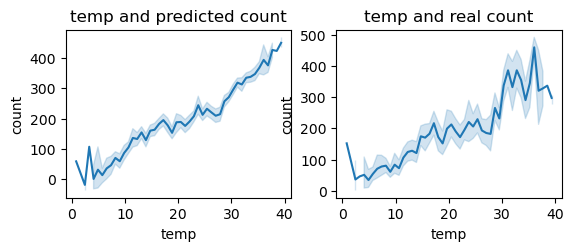

In [39]:
df_X_test = pd.DataFrame(X2_test, columns=['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour',] )
df_X_test.info()
df_y_pred = pd.DataFrame(bike2_pred, columns=['count'])
df_y_test = pd.DataFrame(y_test, columns=['count'])



plt.figure()
plt.subplot(2,2,1)
plt.title('temp and predicted count')
sns.lineplot(x=df_X_test['temp'], y=df_y_pred['count'])


plt.subplot(2,2,2)
plt.title('temp and real count')
sns.lineplot(x=df_X_test['temp'], y=df_y_test['count'])


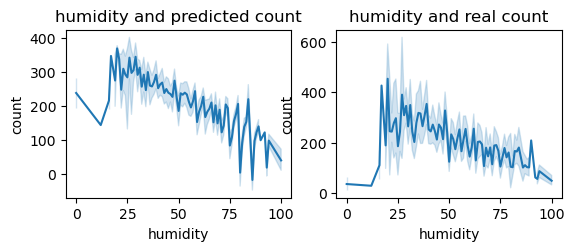

In [40]:


plt.subplot(2,2,3)
plt.title('humidity and predicted count')
sns.lineplot(x=df_X_test['humidity'], y=df_y_pred['count'])

plt.subplot(2,2,4)
plt.title('humidity and real count')
sns.lineplot(x=df_X_test['humidity'], y=df_y_test['count'])

plt.show()

## Discussion

- 프로젝트 1에서 알맞은 learning rate와 그 learning rate 가 더 이상 거의 변하지 않는 값에 도달할 때까지의 반복하게 하는 부분을 여러번 조절하며 결과를 확인할 수 있었습니다.learning rate 는 지나치게 커서도, 지나치게 작아도 안된다는 것을 확인했습니다.

- random state에 대해 다시 생각해 보았습니다. 내부적으로 생성되는 난수를 고정하면 같은 모델이 결과를 낼 때 MSE가 변하지 않습니다. 하지만 이를 변화시키면 그에 따라 MSE도 줄어들거나 늘어납니다.이것은 사실 모델의 성능보다는 확률에 의한 오차임을 알 수 있습니다. 따라서 오차의 폭은 그리 크지 않습니다. 그럼에도 MSE를 조금이라도 더 줄이기 위해 마지막에는 random state 값까지 조절하게 되었습니다. 조금 더 모델 자체의 성능을 올리고자 노력했으면 하는 아쉬움이 남습니다.

- 프로젝트 2에서 사이킷런이 제공하는 선형회귀 모델을 쉽게 사용할 수 있어서 편했습니다. 2번 프로젝트에는 데이터의 어떤 피처를 사용해 학습을 해야하는지를 좀 더 자세히 들여다 볼 수 있었습니다. 상관계수를 조사하고 비교적 상관계수가 0에 가까운 몇 개의 피처를 삭제했는데 드라마틱한 효과는 없었습니다. (그만큼 삭제한 피처들이 영향력이 없다고도 볼 수 있음.) 어떠한 피처를 더 삭제하면, 혹은 어떠한 의미있는 피처를 더 추출하면 성능이 좋아질 지 고민해 보았습니다. 데이터의 temp와 atemp는 사실 큰 차이가 없는 온도/체감온도 입니다. 저는 두 피처를 모두 고려했지만 만약 두 피처가 그렇게 다른 양상을 보이지 않는다면 오히려 두 피처를 모두 고려하는 것은 온도라는 factor를 더 비중있게 모델이 받아들이는 건 아닌가 하고 생각이 들었습니다. 둘 중 하나를 삭제하고 결과를 체크해 보지 못한 점이 아쉽습니다.


- 아직 matplotlib 으로 데이터와 결과를 시각화하는 부분이 조금 부족하다는 생각이 들었습니다. 다음 기회에는 조금 더 보기 쉽고, 데이터의 특징을 잘 반영하는 시각화 자료를 만들어보려고 노력해야겠습니다.

## References

- https://numpy.org/doc/stable/reference/generated/numpy.dot.html (dot 메서드)  

- https://numpy.org/doc/stable/reference/generated/numpy.transpose.html#numpy-transpose (행렬transpose 메서드)  

- https://www.kaggle.com/competitions/bike-sharing-demand/data (자전거 프로젝트 데이터 디스크립션)  

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime)  (to_datetime 활용)   

- https://wikidocs.net/157461 (상관계수 corr, corrwith)

- https://khw11044.github.io/blog/blog-etc/2020-12-21-markdown-tutorial2/#latex%EB%AC%B8%EB%B2%95 (마크다운 라텍스 문법)

